In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
import statsmodels.api as sm
from colorama import Fore, Style
from scipy.optimize import fsolve, curve_fit
import yfinance as yf
import akshare as ak
import sys
sys.path.append('../src') 
from utils import plot_candlestick, get_optimum_clusters, exponential_func

from chinese_index_etf_strategy import etf_strategy, etf_regression
from chinese_commodity_strategy import commodity_strategy

## Some sample code that're working

In [ ]:
plt.figure(figsize=(8,4.8))

# 红利指数
etf_code = 'csi000922'
df = etf_strategy(etf_code, source="index").df
plt.plot(df['date'], df['close'] / df.iloc[0]['close'], label='honglizhishu')
# 红利etf
try:
    etf_code = '515180'
    df_1 = etf_strategy(etf_code).df
    plt.plot(df_1['date'], df_1['close'] / df_1.iloc[0]['close'], label='hongli etf')
except:
    pass
plt.legend()

In [3]:
# Tongxin ETF, changnei, history
etf_code = "sh515880"  # ETF代码
etf_hist = ak.fund_etf_hist_sina(symbol=etf_code)
etf_hist.tail()

,date,open,high,low,close,volume
1463,2025-09-18,2.562,2.724,2.560,2.655,942795427
1464,2025-09-19,2.686,2.730,2.634,2.681,678130073
1465,2025-09-22,2.682,2.724,2.603,2.712,544122882
1466,2025-09-23,2.808,2.838,2.644,2.734,898556434
1467,2025-09-24,2.652,2.748,2.629,2.716,730647072


In [4]:
# Tongxin ETF, changnei, realtime
df = ak.fund_etf_spot_ths()
df[df['基金代码']=='515880']

,序号,基金代码,基金名称,当前-单位净值,当前-累计净值,前一日-单位净值,前一日-累计净值,增长值,增长率,赎回状态,申购状态,最新-交易日,最新-单位净值,最新-累计净值,基金类型,查询日期
1230,1231,515880,国泰中证全指通信设备ETF,2.7124,2.7124,2.7307,2.7307,-0.0183,-0.67,开放,开放,2025-09-24,2.7124,2.7124,股票型,2025-09-24


In [5]:
# Tongxin ETF, changnei, lishi and shishi
etf_code = "515880"  # ETF代码
start_date = (datetime.today() - relativedelta(years=3)).strftime('%Y%m%d')   # 开始日期
end_date = datetime.today().strftime('%Y%m%d')  # 结束日期

try:
    etf_hist = ak.fund_etf_hist_em(symbol=etf_code, period="daily", start_date=start_date, end_date=end_date, adjust="")
    etf_hist.rename(columns={"日期": 'date', "开盘": 'open', "收盘": 'close', "最高": 'high', "最低": 'low', "成交量": 'volume', "成交额": 'amount'}, inplace=True)
    etf_hist.tail()
except:
    pass

In [6]:
# Huangjin, history
spot_hist_sge_df = ak.spot_hist_sge(symbol='Au99.99')
spot_hist_sge_df['date']= pd.to_datetime(spot_hist_sge_df['date'])
spot_hist_sge_df.tail()

,date,open,close,low,high
2125,2025-09-18,832.8,824.59,822.00,837.00
2126,2025-09-19,830.0,826.71,823.00,830.00
2127,2025-09-22,827.0,839.50,827.00,845.00
2128,2025-09-23,843.0,850.65,840.10,850.88
2129,2025-09-24,854.0,856.63,848.75,856.80


In [7]:
last_49day_price = spot_hist_sge_df['close'][-50:-1]
p_ma = np.mean(last_49day_price)
print('50MA break point:', round(p_ma,2))

50MA break point: 792.15


In [8]:
# Huangjin, realtime
spot_quotations_sge_df = ak.spot_quotations_sge(symbol="Au99.99")
spot_quotations_sge_df[spot_quotations_sge_df['时间'] == spot_quotations_sge_df['时间'].max()]

,品种,时间,现价,更新时间
147,Au99.99,02:27:00,848.2,2025年09月25日 02:27:55


In [9]:
spot_quotations_sge_df[spot_quotations_sge_df['时间'] == spot_quotations_sge_df['时间'].max()]['现价']

147    848.2
Name: 现价, dtype: float64

## ALL ETFs

In [10]:
# 石油石化
etf_code = "516570"
etf_strategy(etf_code).output()

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [ ]:
# 中证银行
etf_code = "512820"
etf_strategy(etf_code, start='20180101').output()
print(f'Regression price since launch: {etf_regression(etf_code)}')

In [ ]:
# 500低波
etf_code = "512260"
etf_strategy(etf_code).output()

In [ ]:
# 半导体
etf_code = "512480"
etf_strategy(etf_code).output()

In [ ]:
# 环保
etf_code = "512580"
etf_strategy(etf_code).output()

In [ ]:
# 创业板
etf_code = "159948"
etf_strategy(etf_code).output()

In [ ]:
# 机器人
etf_code = "562500"
etf_strategy(etf_code).output()

In [ ]:
# 人工智能
etf_code = "159819"
etf_strategy(etf_code).output()

In [ ]:
# 必选消费
etf_code = "512600"
etf_strategy(etf_code).latest_metric()
etf_strategy(etf_code).infer_metric()
etf_strategy(etf_code, start='20210101').output()

In [ ]:
# 家电
etf_code = "560880"
etf_strategy(etf_code).output()

In [ ]:
# 有色金属
etf_code = "512400"
etf_strategy(etf_code).output()

In [ ]:
# 油气
etf_code = "159697"
etf_strategy(etf_code).output()

In [ ]:
# 通信
etf_code = "515880"
etf_strategy(etf_code).output()

In [ ]:
# 创新药
etf_code = "516080"
etf_strategy(etf_code).output()

In [ ]:
# 中药
etf_code = "159647"
etf_strategy(etf_code).output()

In [ ]:
# 煤炭
etf_code = "515220"
etf_strategy(etf_code).output()

In [ ]:
# 红利低波
etf_code = "512890"
etf_strategy(etf_code).output()
etf_strategy(etf_code).plot_weekly_chart()
etf_strategy(etf_code).latest_metric()
etf_strategy(etf_code).infer_metric()
print(f'Regression price since launch: {etf_regression(etf_code)}')

In [ ]:
# 红利
etf_code = "515180"
etf_strategy(etf_code).output()
etf_strategy(etf_code).latest_metric()
etf_strategy(etf_code).infer_metric()
etf_strategy(etf_code).plot_weekly_chart()
print(f'Regression price since launch: {etf_regression(etf_code)}')

In [ ]:
# 黄金
commodity_code = 'Au99.99'
commodity_strategy(commodity_code).output()

In [ ]:
# 传媒
etf_code = "512980"
etf_strategy(etf_code).output()

In [ ]:
# 地产
etf_code = "159940"
etf_strategy(etf_code).output()

In [ ]:
# 汽车
etf_code = "516110"
etf_strategy(etf_code).output()

In [ ]:
# 恒生科技
etf_code = "513260"
etf_strategy(etf_code).output()

In [ ]:
# 恒生医疗
etf_code = "513060"
etf_strategy(etf_code).output()

In [ ]:
# 恒生
etf_code = "513660"
etf_strategy(etf_code).output()

In [ ]:
# 恒生红利低波
etf_code = "159545"
etf_strategy(etf_code).output()

In [ ]:
# 上证50
etf_code = "510050"
etf_strategy(etf_code).output()

In [ ]:
# 沪港深500
etf_code = "517000"
etf_strategy(etf_code).output()

### 指数

* Current etf price: 5440.51
* Recent high: 6209.67
* Current etf price is at 87.61% of recent high
Latest 20 Day MA: 5503.98
Latest lower Bollinger Band, 20MA: 5418.01
Latest higher Bollinger Band, 20MA: 5589.95
Latest 50 Day MA: 5550.12
Latest lower Bollinger Band, 50MA: 5398.61
Latest higher Bollinger Band, 50MA: 5701.64
Latest 50 Day EMA: 5518.97
Latest 120 Day MA: 5481.56
Latest 200 Day MA: 5452.02
Latest 200 Day EMA: 5453.74
Latest 10 Week MA: 5537.41
Latest 20 Week MA: 5499.87
Latest 30 Week MA: 5465.26
Latest 40 Week MA: 5437.79
Latest Lower Weekly Bollinger Band, 20MA: 5363.23
Latest Higher Weekly Bollinger Band, 20MA: 5636.5

Latest RSI: 41.42 
Latest MACD Divergence: -7.415 
20MA crosses 50MA at 6978.6
20MA break point: 5507.32
20MA lower Bollinger Band break point: 5411.14
20MA Upper Bollinger Band break point: 5603.5
50MA break point: 5552.36
50MA lower Bollinger Band break point: 5392.34
50MA Upper Bollinger Band break point: 5712.39
120MA break point: 5481.9
200MA break 

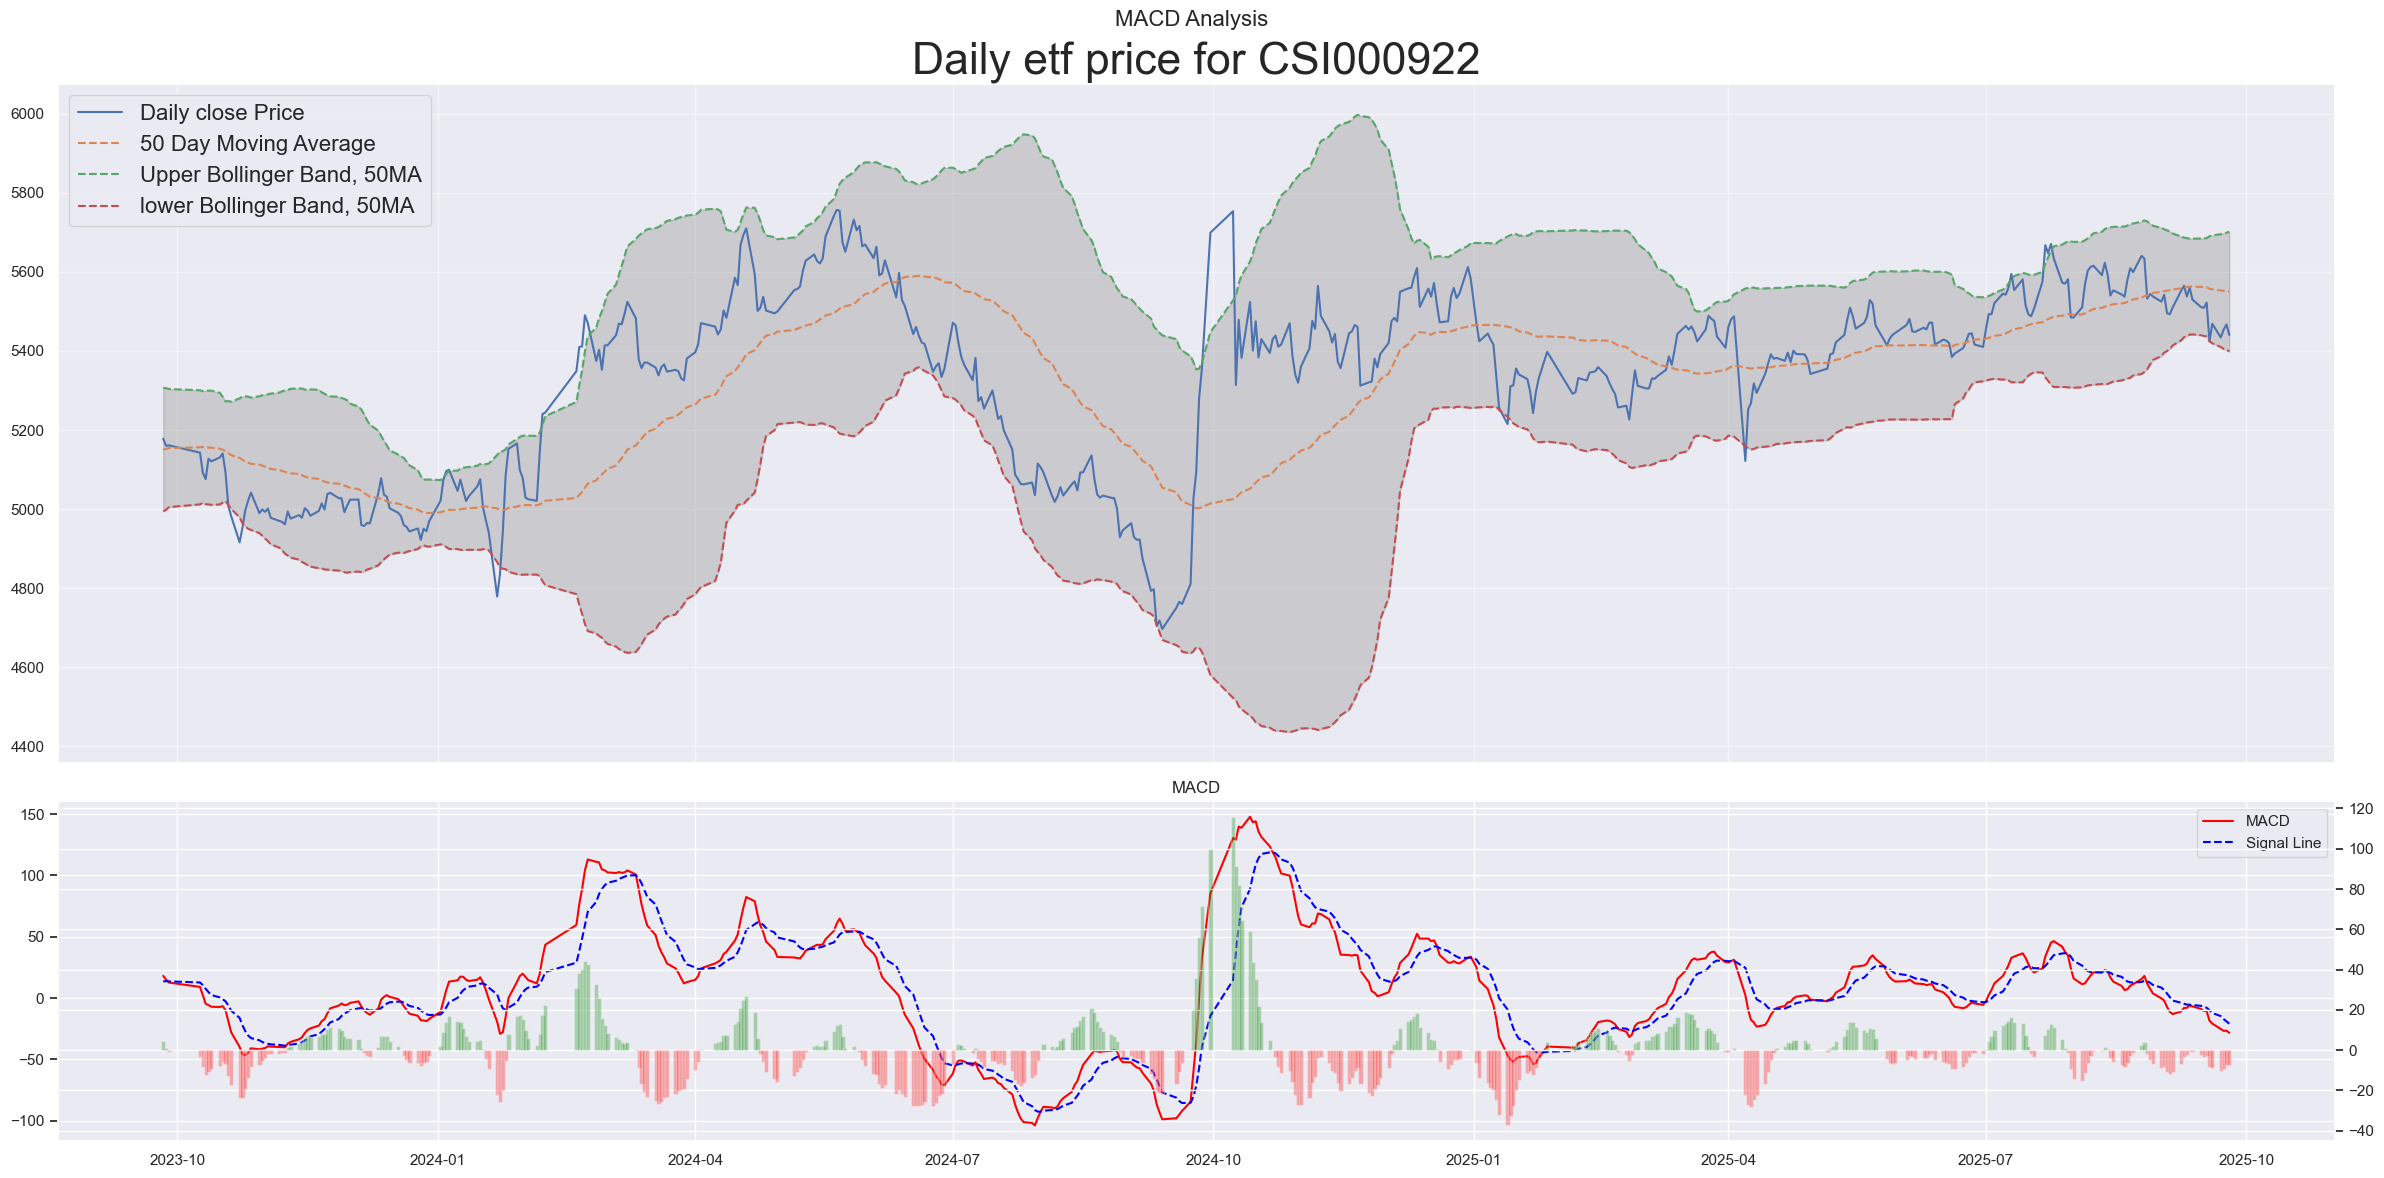

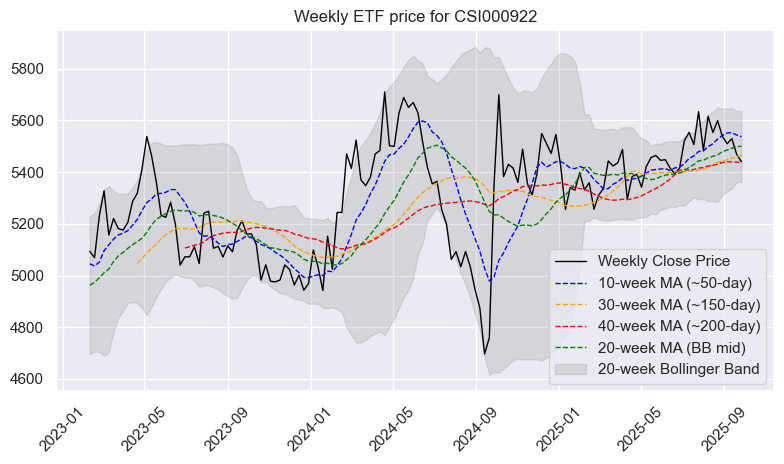

Current RSI: 34.56 
Current MACD Divergence: -6.7482 
Tomorrow inferred RSI: 32.23 
Tomorrow inferred MACD Divergence: -5.7713 


In [4]:
# 红利指数
etf_code = 'csi000922'
etf_strategy(etf_code, source="index").output()
etf_strategy(etf_code, source="index").plot_weekly_chart()
etf_strategy(etf_code, source="index").latest_metric()
etf_strategy(etf_code, source="index").infer_metric()

In [ ]:
# 中证消费
etf_code = 'sh000932'
etf_strategy(etf_code, source="index").output()
# etf_strategy(etf_code, source="index").plot_weekly_chart() # not useful
etf_strategy(etf_code, source="index").latest_metric()
etf_strategy(etf_code, source="index").infer_metric()

### Test a "momentum driven" strategy

In [ ]:
def backtest_momentum_strategy(price_df, initial_cash=100_000, cycle=21, window=20, sell_early=False):
    """
    Backtest the momentum strategy with X-trading-day evaluation cycle.
    Returns:
        result_df: Daily portfolio value DataFrame
        actions_df: Log of only buy/sell actions
    """
    price_df = price_df.sort_index()
    
    # cycle-day moving average
    ma = price_df.rolling(window=window).mean()
    
    # cycle-day % change
    pct_change = price_df.pct_change(cycle)
    
    # Portfolio state
    cash = initial_cash
    shares = 0
    current_stock = None
    portfolio_values = []
    actions = []

    dates = price_df.index
    
    # for i in range(cycle, len(dates)):  # start from the 22nd trading day
    for i in range(cycle, 21*13):  # Check performance for one year
        date = dates[i]
        
        # Step (1): every cycle trading days, rebalance
        if (i - cycle) % cycle == 0:
            # Sell previous stock if any
            if current_stock is not None:
                sell_price = price_df.loc[date, current_stock]
                cash += shares * sell_price
                actions.append([date, "SELL", current_stock, sell_price, shares])
                shares = 0
                current_stock = None
            
            # Find candidates above ma
            candidates = [s for s in price_df.columns 
                          if price_df.loc[date, s] > ma.loc[date, s]]
            
            if candidates:
                # Pick stock with largest cycle-day % change
                stock_changes = pct_change.loc[date, candidates]
                pick = stock_changes.idxmax()
                buy_price = price_df.loc[date, pick]
                current_stock = pick
                shares = cash // buy_price
                cash -= shares * buy_price
                actions.append([date, "BUY", pick, buy_price, shares])
        
        # Step (2): sell early if price drops below ma
        if sell_early and current_stock is not None:
            if price_df.loc[date, current_stock] < ma.loc[date, current_stock]:
                sell_price = price_df.loc[date, current_stock]
                cash += shares * sell_price
                actions.append([date, "SELL_EARLY", current_stock, sell_price, shares])
                shares = 0
                current_stock = None
        
        # Record portfolio value
        if current_stock is not None:
            value = cash + shares * price_df.loc[date, current_stock]
        else:
            value = cash
        portfolio_values.append((date, value))
    
    # Create results DataFrames
    result_df = pd.DataFrame(portfolio_values, columns=["Date", "PortfolioValue"])
    result_df.set_index("Date", inplace=True)
    
    actions_df = pd.DataFrame(actions, columns=["Date", "Action", "Stock", "Price", "Shares"])
    actions_df.set_index("Date", inplace=True)
    
    total_days = len(result_df)
    final_value = result_df["PortfolioValue"].iloc[-1]
    annualized_return = (final_value / initial_cash) ** (252 / total_days) - 1
    
    return result_df, actions_df, annualized_return


def average_annualized_return(price_df, initial_cash=100_000, n_test=100, cycle=21, window=20, sell_early=False):
    """
    Runs the strategy from different starting offsets (0-20) and averages annualized return.
    """
    returns = []
    for offset in range(n_test):  # 100 possible start offsets
        sliced_df = price_df.iloc[offset:].copy()
        if len(sliced_df) < 42:  # ensure enough data for lookback + holding
            continue
        _, _, ann_return = backtest_momentum_strategy(sliced_df, initial_cash, cycle=cycle, window=window, sell_early=sell_early)
        returns.append(ann_return)
    print(f"Average return: {np.mean(returns) if returns else np.nan}")
    print(f"Return STD: {np.std(returns) if returns else np.nan}")

    return returns

In [ ]:
etf_list = [
"516570",
"512820",
"512260",
"512480",
"512580",
"159948",
"562500",
"159819",
"512600",
"560880",
"512400",
# "159697", # history too short
"515880",
"516080",
"159647",
"515220",
"512890",
"512980",
"159940",
"516110",
"513260",
"513060",
"513660",
# "159545", # history too short
"510050",
]
etf_code = etf_list[0]

df_all = ak.fund_etf_hist_em(
            symbol=etf_code.upper(),
            start_date=(datetime.today() - relativedelta(years=5)).strftime('%Y%m%d'),
            end_date=datetime.today().strftime('%Y%m%d'),
            period='daily',  # Default to daily,
            adjust='qfq'
)
df_all = df_all[['日期','收盘']].set_index('日期')
df_all = df_all.rename(columns={'收盘': etf_code})
for etf_code in etf_list[1:]:
    df = ak.fund_etf_hist_em(
            symbol=etf_code.upper(),
            start_date=(datetime.today() - relativedelta(years=5)).strftime('%Y%m%d'),
            end_date=datetime.today().strftime('%Y%m%d'),
            period='daily',  # Default to daily,
            adjust='qfq'
    )[['日期','收盘']].set_index('日期')
    df = df.rename(columns={'收盘': etf_code})
    df_all = pd.merge(df_all, df, left_index=True, right_index=True, how='inner')
df_all

In [ ]:
returns = average_annualized_return(df_all, initial_cash=100000, cycle=21, window=50)

In [ ]:
returns = average_annualized_return(df_all, initial_cash=100000, cycle=21, window=20)

In [ ]:
result_df, actions_df, annualized_return = backtest_momentum_strategy(df_all, cycle=21, window=20)
print(annualized_return)
result_df

In [ ]:
actions_df

In [ ]:
# benchmark
good_etfs = {
    "honglidibo": "512890",
    "hongli": "515180"}
for etf in good_etfs:
    etf_code = good_etfs[etf]
    df_etf = etf_strategy(etf_code, start='20150101').return_result()
    df_etf.set_index('date',inplace=True)
    valid_start_range = range(0, len(df_etf) - 252)
    start_points = np.random.choice(valid_start_range, size=800, replace=False)
    returns = []
    for start in start_points:
        dates = df_etf.index
        initial_date = dates[start]
        end_date = dates[start + 252]
        initial_price = df_etf.loc[initial_date]['close']
        end_price = df_etf.loc[end_date]['close']
        returns.append(end_price/initial_price - 1)
    print(etf)
    print(f"Average return: {np.mean(returns) if returns else np.nan}")
    print(f"Return STD: {np.std(returns) if returns else np.nan}")
    print(f"earning-cost ratio: {abs((np.mean(returns)+1.96*np.std(returns))/(np.mean(returns)-1.96*np.std(returns))) if returns else np.nan}")

In [ ]:
etf_regression("512890", detailed=True)

In [ ]:
etf_regression("515180", detailed=True)